In [1]:
import sqlite3

# view the database
conn = sqlite3.connect("steps.db")
c = conn.cursor()
c.execute("SELECT * FROM steps")
rows = c.fetchall()
for row in rows:
    print(row)
conn.close()


(1, '1348', 20)
(2, '1349', 2)


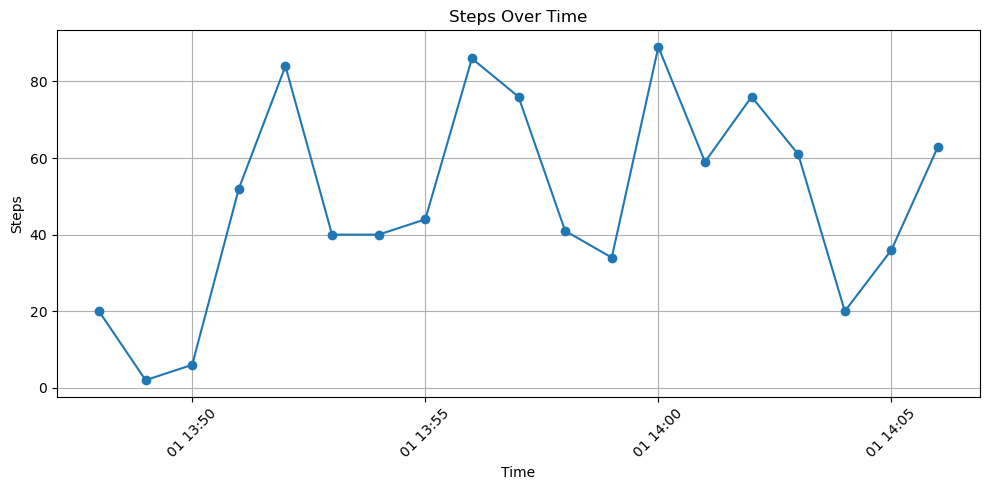

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("steps.db")
df = pd.read_sql_query("SELECT * FROM steps", conn)
# parse the date column to datetime (currently in HHMM format -> HH:MM)
df['date'] = pd.to_datetime(df['date'], format='%H%M')
df
# plot the data over time
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['steps'], marker='o')
plt.title('Steps Over Time')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

conn.close()